# Lab E Review Session
By Simon Van Norden & Nicolas Harvie 
***

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

import warnings 
warnings.filterwarnings("ignore")

***
## Non-Parametrics and Simulation 

### Runs Test
The idea here is to change the series into binary variables to determine whether the observations are independent or not. 

**Important** You conclude that observations are not independent if too low or too high !

Why is this the case ?

In [2]:
Image(url="../slide_images/Runs.png", width=700, height=500)

### Goodness of Fit Test 
The idea here is to compare two distributions. Whether the test rejects the null or not depends on the similarity of two distributions

In [3]:
Image(url="../slide_images/KS1.png", width=600, height=300)

I'll show graphically what happens 

In [4]:
bg = np.random.default_rng()
n = bg.normal(size=1000)
t_5 = bg.standard_t(5, 1000)

Our initial normal distribution

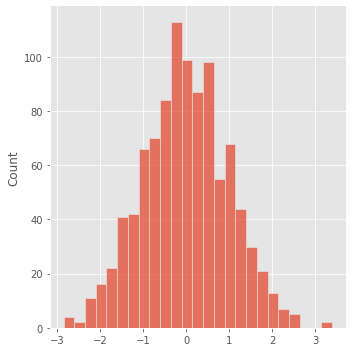

In [5]:
sns.displot(n, bins= 25)

Our initial t_distribution

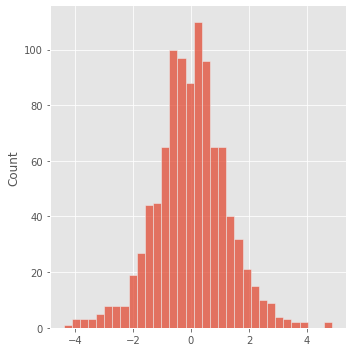

In [6]:
sns.displot(t_5)

You can see that the two distributions are not equivalent pretty clearly. However, KS is a statistical test and cannot be sure of that. It should be that the test rejects 100% of the time, since the two distributions are not the same.

In [7]:
stats.kstest(t_5, n)

KstestResult(statistic=0.042, pvalue=0.34112475112661245, statistic_location=1.7140378626209793, statistic_sign=-1)

You can see that the test doesn't pick on the differences between the two distributions sufficiently to reject the null. 

In [8]:
d = {}
for i in range(1,11):
    d[str(i) +' dfs'] = stats.kstest(bg.standard_t(i, size=1000), bg.normal(size=1000))[1]


In [9]:
d

{'1 dfs': 3.1682132882618906e-07,
 '2 dfs': 0.0012207544622917959,
 '3 dfs': 0.04839715079181246,
 '4 dfs': 0.09710349657052789,
 '5 dfs': 0.21939649929677082,
 '6 dfs': 0.3136800387320582,
 '7 dfs': 0.34112475112661245,
 '8 dfs': 0.06917625399020766,
 '9 dfs': 0.014870029418858987,
 '10 dfs': 0.1082872208757189}

You can see that the test becomes rapidly incapable of distinguishing between the student_t and the normal as degrees of freedom increase. 

Why is that the case?

*** 
## Modeling Risk

### Conditional Value At Risk
The goal here is to allow for an exogenous variable in our VaR model

In [10]:
Image(url="../slide_images/CVAR.png", width=600, height=500)

In [11]:
data = pd.read_csv('../data/TP_1.csv',index_col=0,parse_dates=True)

In [12]:
data

,VWRETD,TWTR,AMZN,TSLA
Date,,,,
2013-11-08,0.012360,-0.072383,0.019647,-0.013036
2013-11-11,0.001005,0.030012,0.011613,0.048916
2013-11-12,-0.002250,-0.023310,-0.013680,-0.047672
2013-11-13,0.008522,0.016706,0.019140,0.006531
2013-11-14,0.004572,0.049061,0.031374,-0.007931
...,...,...,...,...
2022-03-25,0.003084,-0.005667,0.006868,-0.003235
2022-03-28,0.006122,0.013472,0.025593,0.080345
2022-03-29,0.014708,0.040133,0.001920,0.007080


In [13]:
# My Regression
mcoTSLA = sm.OLS(data['TSLA'], sm.add_constant(data['VWRETD'])).fit()

In [14]:
# My sigma 
sigmahat = np.sqrt(mcoTSLA.mse_resid)
sigmahat

0.03093602512563956

In [15]:
# The predictions, which correspond to the mean
mean = mcoTSLA.predict()

In [16]:
# The Probability Point function, which represents here the VaR 
stats.norm.ppf(0.05, loc = mean, scale = sigmahat)

array([-0.03125425, -0.04785475, -0.05261341, ..., -0.02782157,
       -0.06049628, -0.07057938])

### Quantile Regression
We seek the information granted by other variables, but without taking assumptions about the nature of our distribution.

In [17]:
Image(url="../slide_images/QR.png", width=600, height=500)

[Getting Started with Quantile Regression](https://data.library.virginia.edu/getting-started-with-quantile-regression/)


### VaR Coverage
The whole idea is to determine whether our model estimating VaR is correctly specified, hence why the number of hits should not exceed alpha

In [18]:
Image(url="../slide_images/VaR_Coverage.png", width=600, height=500)

### Comparing Risk Model 
We use multiple models so that one can inform us of the other. The Covariance between the hits of a model and the VaR of a model should be nil so that no upgrade can be done.

In [19]:
Image(url="../slide_images/Comparing_Models.png", width=600, height=500)

***
## Elements of Machine Learning

### Ridge 

In [20]:
Image(url="../slide_images/Ridge.png", width=600, height=500)

### LASSO

In [21]:
Image(url="../slide_images/LASSO.png", width=600, height=500)

The run-down is that both of those machine learning methods aim at shrinking the number of factors to avoid overfitting in statistical analysis by modifying the OLS optimization problem.

They both include a variation of a penalty fonction incorporating a "shrinkage coefficient"

**Important** While LASSO may shrink coefficients to 0, this is not the case for Ridge which will tend to 0 but not remove them altogether

### Selecting Lambda
If you remember what you have seen concerning data mining and over-optimization in the previous class, you might have an idea as to why it is important to choose lambda with statistical methods. 

Choosing lambda arbitrarily leaves an additional degree of freedom, which is not good.

In [22]:
Image(url="../slide_images/CV.png", width=600, height=500)

***
## Forecasting with AR and VAR

### Simple Form

In [23]:
Image(url="../slide_images/AR1.png", width=600, height=500)

## IRF Graph
Such a graph shows the impact of a shock on future observations. It dies away with geometric decay when positive because the impact is included in the future observation with some coefficient, which then is applied to the next observation.

In [24]:
Image(url="../slide_images/IRF.png", width=600, height=500)

## Companion Form 
This is just the matrix version of the AR model. It looks a bit scary but knowledge of dot product will make this much easier.

In [25]:
Image(url="../slide_images/Companion.png", width=600, height=500)

In [26]:
Image(url="../slide_images/dot_prod.png", width=600, height=500)

### VAR Model
We complexify the AR model by adding interactions between past values of one variable and present values of another variable.

In [27]:
# This example is KING !!!
Image(url="../slide_images/VAR.png", width=600, height=500)

In [28]:
# For nerds
Image(url='../slide_images/Comp_VAR.png', width=600, height=500)

### Granger Causality
Remember that Granger Causality tells us nothing of TRUE CAUSALITY, it merely informs us of the change of a variable in the present based on a past change in another variable. 

In [29]:
Image(url="../slide_images/GC.png", width=600, height=500)

*** 
## Forecast Evaluation

### Rolling Window 
Remember that forecast evaluation using Cross-Validation is problematic when we have series that are autocorrelated... Our solution: Rolling windows !

In [30]:
Image(url="../slide_images/rollin.png", width=600, height=500)

### Forecasting Accuracy

In [31]:
Image(url="../slide_images/DM1.png", width=600, height=300)

The Diebold Mariano Test is not used to determine whether one model is better than the other or the reserve. It only tests whether the loss measures associated are significantly different.

To know which one is the best, you have to take a look at the difference in your loss measures themselves...

The MDM is also a test of forecasts, but this one explicitely tests for encompassing.

In [32]:
Image(url="../slide_images/MDM.png", width=600, height=500)

***
## Unit Roots and Cointegration

### Nonstationarity Basics
Nonstationarity implies that the impact of past shocks are permanent to future observations.

In [33]:
# Conditions and variations
Image(url="../slide_images/Nonstationarity.png", width=600, height=500)

## Walking Randomly

In [34]:
Image(url="../slide_images/Martingale_rand.png", width=600, height=300)

In [35]:
# Determining Our Errors
s = pd.Series(bg.normal(size=200))

# Actual Observation is sum of past errors and new error 
s.sample(100,replace=True,ignore_index=True).cumsum()

0     0.824830
1     1.620456
2     3.240956
3     2.308667
4     1.515132
        ...   
95   -1.254150
96   -0.881825
97   -3.001996
98   -2.029411
99   -1.713843
Length: 100, dtype: float64

## ADF Test
This test is used to determined for stationarity in time series. We are testing Beta (one tail negative), such that if there is stationarity it would imply a feedback loop which "keep" the observations stationary. 

In [36]:
Image(url="../slide_images/adf.png", width=600, height=500)

## VECM
This is simply an extension of the regression presented in the ADF. You can see it as its VAR version.

In [37]:
Image(url="../slide_images/VECM.png", width=600, height=500)

## Cointegration
Two variables that are presumably I(1), but that move together.

In [38]:
Image(url="../slide_images/coint.png", width=600, height=500)

In [39]:
Image(url="../slide_images/coint2.png", width=600, height=500)

*** 
## Principal Component Analysis 


**Resources** </br>
[Step by Step](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)</br>
[Longer](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)</br>
[Longest](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)


In [40]:
Image(url="../slide_images/PCA1.png", width=600, height=500)

In [41]:
Image(url="../slide_images/PCA2.png", width=600, height=500)

## Diebold Li

In [42]:
Image(url="../slide_images/DL1.png", width=600, height=500)

**CAUTION** Contrarily to the notation used in Asset Pricing, BETA ARE FACTORS AND THE EQUATIONS ARE FACTOR LOADINGS

In [43]:
Image(url="../slide_images/DL2.png", width=600, height=500)

Diebold and Li find the factors by running a number of OLS regressions. **THERE IS NO PCA IN D&L** </br>

However, they found that results were close to PCA and that they correspond to Level, Slope and Curvature

In [44]:
Image(url="../slide_images/PCA3.png", width=600, height=500)

Here, consistent with the Asset Pricing notation, Principal Components are FACTORS and Beta are FACTOR LOADINGS. Diebold and Li making our life hard... 

*** 
## Asset Pricing

In [45]:
Image(url="../slide_images/AP1.png", width=600, height=500)

In [46]:
Image(url="../slide_images/FF.png", width=600, height=500)

Observe the notation...

## J-Test 


In [47]:
Image(url="../slide_images/J_stat.png", width=700, height=400)

"A rejection of the null hypothesis implies that the instruments are not satisfying the orthogonality conditions required for their employment."

***
## Maximum Likelihood

**See Lab D**

***
## GARCH
Model that answers to the problem of Volatility Clustering in financial time series


### Testing for Persistent Changes in Variance
Intuitively, we test for autocorrelation of the squared errors because that would imply past variance affects future variance, hence why it is clustered.

In [48]:
Image(url="../slide_images/test_GARCH.png", width=600, height=500)

### ARCH
Intuitively, you can see with the distribution of errors that they are not always the same. The variance equation determines what will be the conditional variance at some time t.

In [49]:
Image(url="../slide_images/ARCH.png", width=600, height=500)

### GARCH
They found that the prior model sucked so they invented a new one which also adds an element of autocorrelation in the conditional variance.

In [50]:
Image(url="../slide_images/GARCH.png", width=600, height=500)

There are loads of different GARCH models (more than you would care for). If you have any specific questions regarding these, you can ask me or post in the forum.

### Estimation of GARCH
You have no choice but to estimate GARCH models with Maximum Likelihood. Why is this the case? Because your error distribution doesn't permit the use of OLS. 

In [51]:
Image(url="../slide_images/garch_est.png", width=600, height=500)